# Tensorflow 2 Keras Model



Keras에서 모델을 만드는 방법은 크게 [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model)를 이용하는 방법과 [Functional API](https://www.tensorflow.org/guide/keras/functional)를 이용하는 방법이 있습니다.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

2023-01-09 18:04:55.027196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Sequantial API

`Sequential` API는 각 레이어에 **정확히 하나의 입력 텐서와 하나의 출력 텐서**가 있는 **일반 레이어 스택**에 적합합니다.  
다음과 같이 모델을 만들 수 있습니다.

In [2]:
# list에 layer를 차례대로 넣습니다
model_seq1 = tf.keras.Sequential([
    Dense(100),
    Dense(200),
    Dense(300)
])

2023-01-09 18:04:58.927950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


다음과 같이 `add` 메서드를 이용해서 하나씩 레이어를 추가할 수 있습니다.

In [3]:
model_seq2 = tf.keras.Sequential()
model_seq2.add(Dense(100))
model_seq2.add(Dense(200))
model_seq2.add(Dense(300))

## Functional API
`Functional` API는 `Sequential`API보다 더 유연한 모델을 만들 수 있습니다. 위에서 만든 모델을 `Functional` API를 이용해서 만들어 보겠습니다.

In [4]:
inputs = Input(shape=(784)) #먼저 Input layer를 만듭니다. shape는 임의로 설정했습니다.
x = Dense(100)(inputs) # 각 layer의 output을 다음 layer의 input으로 넣어주면 됩니다.
x = Dense(200)(x)
outputs = Dense(300)(x)

model_func = tf.keras.Model(inputs=inputs, outputs=outputs) #마지막엔 tf.keras.Model을 이용합니다.

이번에는 다양한 구조의 모델을 `Functional` API를 이용해서 만들어 보겠습니다.

### Residual connection (Skip connection)

residual connection은 특정 layer의 output이 이후의 몇개 layer를 통과하지 않고 우회하는 connection입니다.
아래와 같은 구조의 모델을 만들어 보겠습니다. 각 Dense layer의 node 갯수는 100개이고, ReLU Activation을 사용합니다.
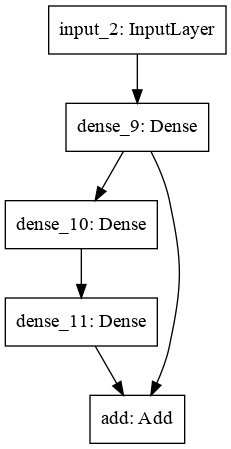

In [5]:
inputs = Input(shape=(28, 28, 1))
###### 아래 빈칸. 실습하면서 완성 #####
x1 = Flatten(input_shape=(28,28,1))(inputs)
x2 = Dense(100,activation = 'relu')(x1)
x3 = Dense(100,activation = 'relu')(x2)
x4 = Dense(100,activation = 'relu')(x3)
outputs = x2 + x4
###### 빈칸 끝 ##### 

model_res = tf.keras.Model(inputs=inputs, outputs= outputs)

`tf.keras.utils.plot_model`을 이용하면 모델 시각화가 가능합니다. 위에 있는 그림과 동일하게 출력되는지 확인해 봅시다.

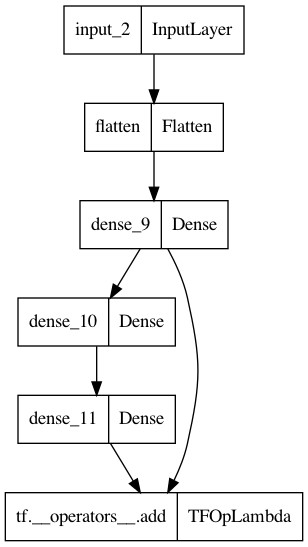

In [11]:
# This may not work if graphviz is not installed.. you need to install by apt-get install
tf.keras.utils.plot_model(model_res, to_file='model_res.png')

### Multiple inputs / outputs (Inception structure)

특정 layer의 output을 여러 layer가 동시에 input으로 이용하는 경우, 여러 layer의 output이 하나의 layer의 input으로 들어가는 경우도 가능합니다.

아래 셀의 출력에 표시된 그림과 같은 구조의 모델을 만들어 보겠습니다. <br>
각 Dense layer의 Node 갯수는 100개이고 ReLU activation을 사용합니다. 단, 마지막 Dense layer는 Softmax activation을 사용합니다.
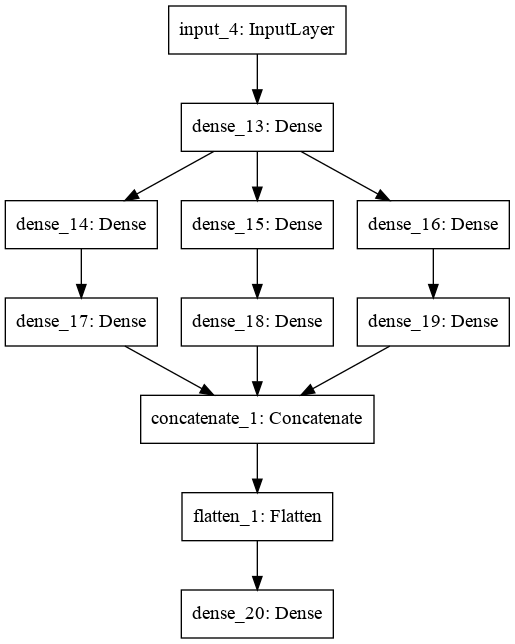

In [14]:
inputs = Input(shape=(28, 28, 1))
x1 = Dense(100, activation='relu')(inputs)
###### 아래 빈칸. 실습하면서 완성 #####
x1_1 = Dense(100, activation='relu')(x1)
x1_2 = Dense(100, activation='relu')(x1)
x1_3 = Dense(100, activation='relu')(x1)
x2_1 = Dense(100, activation='relu')(x1_1)
x2_2 = Dense(100, activation='relu')(x1_2)
x2_3 = Dense(100, activation='relu')(x1_3)
x = Concatenate(axis=-1)([x2_1,x2_2,x2_3])
x = Flatten()(x)
outputs= Dense(10, activation = 'softmax')(x)


###### 빈칸 끝 ##### 
model_multi = tf.keras.Model(inputs=inputs, outputs=outputs) 

시각화를 통해 동일한 구조로 출력되는지 확인해 봅시다.

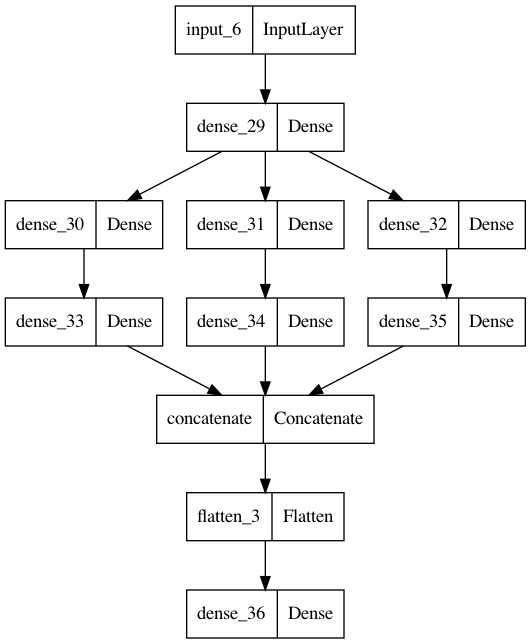

In [20]:
tf.keras.utils.plot_model(model_multi, to_file='model_multi.png')

### Sharing layer

아래의 그림처럼 두 개의 모델이 특정 layer를 공유할 수도 있습니다.
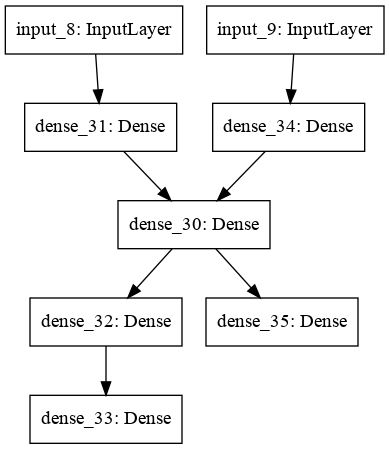

In [16]:
# 공유할 layer
layer_share = Dense(100, activation='relu')

# Model 1
inputs1 = Input(shape=(28, 28, 1))
###### 아래 빈칸. 실습하면서 완성 #####
x1 = Dense(100, activation= 'relu')(inputs1)
x1 = layer_share(x1)
x1 = Dense(100, activation ='relu')(x1)
outputs1 = Dense(10, activation ='softmax')(x1)

###### 빈칸 끝 ##### 
model1 = tf.keras.Model(inputs=inputs1, outputs=outputs1)


# Model 2
inputs2 = Input(shape=(32, 32, 3))
###### 아래 빈칸. 실습하면서 완성 #####
x2 = Dense(100, activation= 'relu')(inputs2)
x2 = layer_share(x2)
outputs2 = Dense(100, activation='relu')(x2)


###### 빈칸 끝 ##### 
outputs2 = Dense(10, activation='softmax')(x2)
model2 = tf.keras.Model(inputs=inputs2, outputs=outputs2)

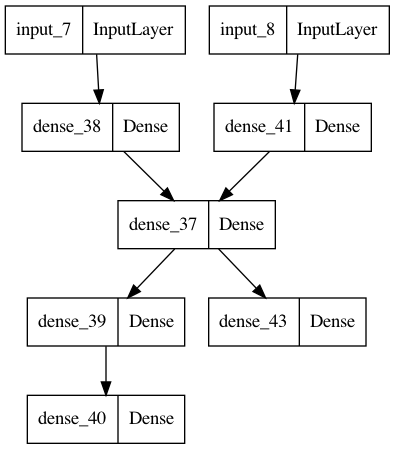

In [21]:
model = tf.keras.Model(inputs = [inputs1,inputs2], outputs=[outputs1,outputs2])
tf.keras.utils.plot_model(model, to_file='model_share.png')